<a href="https://colab.research.google.com/github/serithemage/2017_CSAT_Mathematics_Type_GA/blob/master/%ED%86%B5%EC%8B%A0%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EC%9D%B4%ED%83%88_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install markupsafe==2.0.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


데이터 다운로드

In [4]:
import pandas as pd

- 데이터 로드
  - 데이터 상세: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

이제 Pycaret으로 모델을 만들어 봅시다. 아래 내용들은 pycaret 2진분류 튜토리얼을 데이터만 바꿔서 거의 그대로 실행한겁니다.

In [6]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
exp = setup(df, silent=True, target='Churn')

,Description,Value
0,session_id,4707
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8087,0.8498,0.5084,0.6867,0.5834,0.4631,0.4723,19.651
ada,Ada Boost Classifier,0.8055,0.8477,0.5421,0.6613,0.5950,0.4688,0.4733,5.338
ridge,Ridge Classifier,0.8037,0.0000,0.5038,0.6711,0.5746,0.4506,0.4589,2.173
lr,Logistic Regression,0.8010,0.8465,0.5306,0.6514,0.5839,0.4552,0.4599,29.282
lightgbm,Light Gradient Boosting Machine,0.8006,0.8368,0.5422,0.6477,0.5893,0.4592,0.4630,0.526
rf,Random Forest Classifier,0.7935,0.8288,0.4585,0.6568,0.5387,0.4115,0.4231,6.254
et,Extra Trees Classifier,0.7864,0.8169,0.4592,0.6314,0.5305,0.3972,0.4061,9.317
dt,Decision Tree Classifier,0.7742,0.6957,0.5291,0.5809,0.5531,0.4027,0.4039,0.596
knn,K Neighbors Classifier,0.7665,0.7774,0.5023,0.5654,0.5312,0.3767,0.3783,3.746
dummy,Dummy Classifier,0.7355,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.058


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4707, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gbc, lr, ridge, ada, lightgbm이 비슷한 성능을 내고 있습니다. 여러번 돌리면 순위가 바뀌기도 하는데 암튼 여기서는 맨 위의 gbc를 가지고 모델을 만들어 봅시다.

In [9]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8215,0.8603,0.5649,0.7048,0.6271,0.5117,0.5171
1,0.7931,0.8496,0.4733,0.6526,0.5487,0.4188,0.4279
2,0.7830,0.8460,0.4427,0.6304,0.5202,0.3854,0.3955
3,0.8256,0.8625,0.5954,0.7027,0.6446,0.5301,0.5333
4,0.8276,0.8914,0.5769,0.7143,0.6383,0.5268,0.5320
5,0.8114,0.8447,0.4769,0.7126,0.5714,0.4565,0.4716
6,0.8073,0.8372,0.4846,0.6923,0.5701,0.4509,0.4628
7,0.8053,0.8401,0.5000,0.6771,0.5752,0.4526,0.4613
8,0.8174,0.8321,0.4923,0.7273,0.5872,0.4755,0.4904


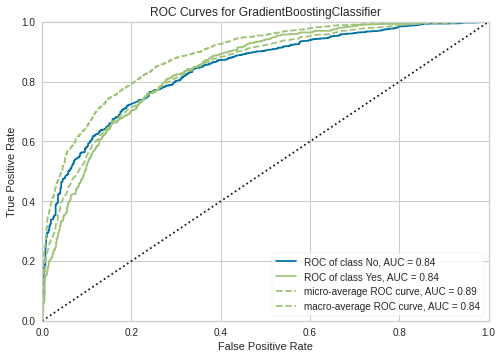

In [10]:
plot_model(model)

In [12]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8337,0.8587,0.6031,0.7248,0.6583,0.5496,0.5537
1,0.7809,0.8431,0.5038,0.6055,0.5500,0.4068,0.4098
2,0.7911,0.8427,0.5191,0.6296,0.5690,0.4328,0.4363
3,0.8154,0.8667,0.6107,0.6667,0.6375,0.5140,0.5148
4,0.8256,0.8884,0.6154,0.6897,0.6504,0.5347,0.5362
5,0.8032,0.8388,0.5000,0.6701,0.5727,0.4484,0.4565
6,0.7951,0.8296,0.5000,0.6436,0.5628,0.4317,0.4376
7,0.8012,0.8364,0.5077,0.6600,0.5739,0.4471,0.4537
8,0.8174,0.8406,0.5231,0.7083,0.6018,0.4868,0.4962


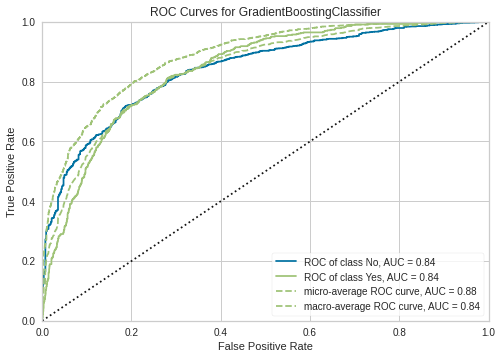

In [13]:
plot_model(tuned_model)

하이퍼파라미터를 튜닝하니 미세하게나마 수치가 좋아진것을 알 수 있습니다.

이제 어떤 특징이 이탈율에 크게 영향을 미치는지 알아봅시다.

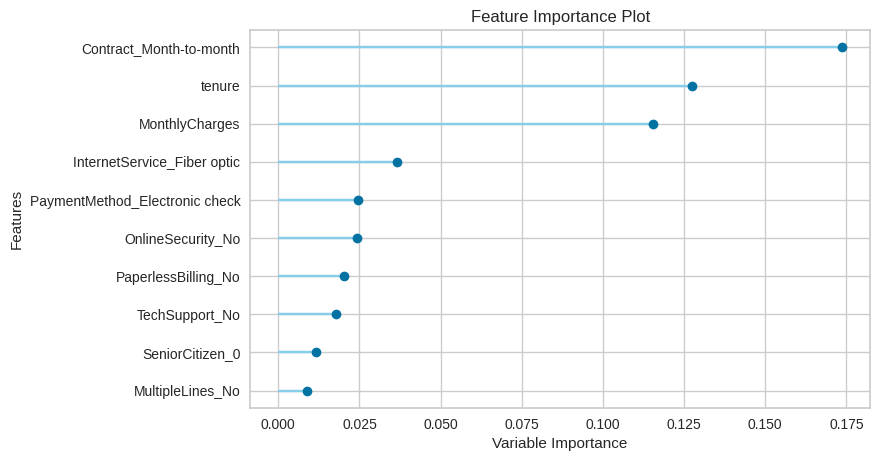

In [14]:
plot_model(tuned_model, plot='feature')

# 결론
Statista의 데이터 과학자이신 [Amanda Iglesias Moreno](https://amandaiglesiasmoreno.medium.com/)가 이 데이터 셋을 가지고 프로젝트를 진행한 블로그 입니다.

https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d

위 블로그에서 최종적으로 얻은 정확도는 0.79749이고 Pycaret으로 거의 손대지 않고 만든 정확도는 0.8012 입니다.

이를 통해 얻을 수 있는 결론은 학습 가능한 형태로 데이터를 준비할 수 있는 능력만 있다면 머신러닝에 대해 깊은 지식이나 경험이 없어도 숙련된 데이터 과학자보다 더 나은 결과를 얻을 수도 있다는 것 입니다.

PyCaret🥕짱!